In [10]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

In [11]:
# Загрузка сохраненной модели
model = load_model("wistler_classify_mini.h5")

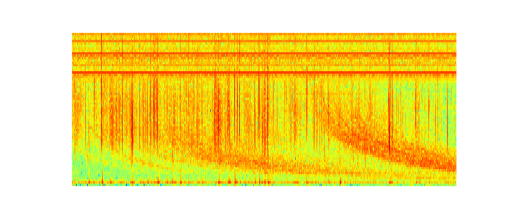

In [36]:
img_width = 1000
img_height = 400

# image_path = "prediction_data/pred2.png"
image_path = "validation_data/whistler/PA070721034000_003.mat_13.png"

# Загрузка изображения
img = load_img(image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')  # Отключение осей координат
plt.show()

1/1 [==============================] - 0s 40ms/step
[[-16.769758   8.302864]]
Predicted class index: 1
Predicted class label: whistler
На изображении скорее всего whistler (100.00% вероятность)


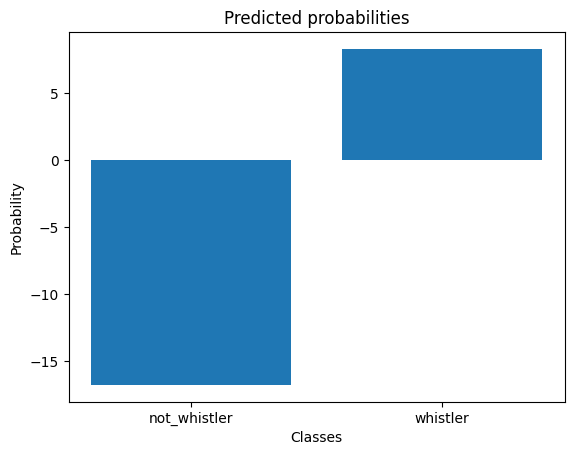

In [39]:
import numpy as np
import tensorflow as tf

# Преобразование изображения в массив и добавление дополнительного измерения
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Прогнозирование класса изображения
predictions = model.predict(img_array)
# Отображение прогнозов
print(predictions)


# Получение метрики вероятности для каждого класса
score = tf.nn.softmax(predictions[0])

# Определение индекса класса с наибольшей вероятностью
predicted_class_index = np.argmax(predictions)
print("Predicted class index:", predicted_class_index)

# Вывод класса с наибольшей вероятностью
# (это предполагает, что у вас есть список классов, к которым относятся ваши предсказания)
class_labels = ["not_whistler", "whistler"]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class label:", predicted_class_label)

# Получение наиболее вероятного класса и вероятности этого класса
predicted_class = class_labels[np.argmax(score)]
probability = 100 * np.max(score)

# Вывод результата прогноза
print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    predicted_class,
    probability
))

# Визуализация результатов (предполагается, что у вас есть метки классов и вероятности для каждого класса)
plt.bar(class_labels, predictions[0])
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Predicted probabilities')
plt.show()
